In [1]:
# Import Libraries..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import data

reviews = pd.read_csv("resturant_review.txt", 
                 sep = '\t', names = ['review','label'])

reviews = reviews[1:]
reviews

,review,label
1,Wow... Loved this place.,1
2,Crust is not good.,0
3,Not tasty and the texture was just nasty.,0
4,Stopped by during the late May bank holiday of...,1
5,The selection on the menu was great and so wer...,1
...,...,...
996,I think food should have flavor and texture an...,0
997,Appetite instantly gone.,0
998,Overall I was not impressed and would not go b...,0
999,"The whole experience was underwhelming, and I ...",0


In [3]:
review_text = list(reviews['review'])
review_text

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [4]:
# Text clean

In [5]:
from processing import TextCleaner

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
tc = TextCleaner.TextCleaner(text = review_text, text_form = 'List', stemming = False, lemmat = True)
text_clean = tc.clean()

In [7]:
#vocabulary

join_text = ' '.join(text_clean)
vocab = set(join_text.split())
vocab.add('<PAD>')
vocab.add('<UNK>')
vocab = sorted(list(vocab))
vocab

['!',
 '!!!',
 '!the',
 '<PAD>',
 '<UNK>',
 'absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodation',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledged',
 'across',
 'actual',
 'actually',
 'added',
 'affordable',
 'afternoon!',
 'again!',
 'ago',
 'ago!',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almond',
 'almost',
 'alone',
 'also',
 'also!',
 'although',
 'always',
 'amazing',
 'amazing!',
 'amazing!!',
 'amazing!!!',
 'amazing!!!!!!!!!!!!!!!!!!!',
 'amazingrge',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'another',
 'anticipated',
 'anymore',
 'anyone',
 'anyone!',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app!',
 'appalling',
 'apparently',
 'appealing',
 'appetite',
 'appetizer',
 'appetizers!!!',
 'apple',
 'approval',
 'area',
 'arent',
 'arepas',
 'aria',
 'around',
 'array',
 'arrived',
 'arrives',
 'arriving',
 'article',
 'ask',
 'asked',
 '

In [8]:
vocab.remove('!')
vocab.remove('!!!')
vocab.remove('!the')
vocab

['<PAD>',
 '<UNK>',
 'absolute',
 'absolutely',
 'absolutley',
 'accident',
 'accommodation',
 'accomodate',
 'accordingly',
 'accountant',
 'ache',
 'acknowledged',
 'across',
 'actual',
 'actually',
 'added',
 'affordable',
 'afternoon!',
 'again!',
 'ago',
 'ago!',
 'ahead',
 'airline',
 'airport',
 'ala',
 'albondigas',
 'allergy',
 'almond',
 'almost',
 'alone',
 'also',
 'also!',
 'although',
 'always',
 'amazing',
 'amazing!',
 'amazing!!',
 'amazing!!!',
 'amazing!!!!!!!!!!!!!!!!!!!',
 'amazingrge',
 'ambiance',
 'ambience',
 'amount',
 'ample',
 'andddd',
 'angry',
 'another',
 'anticipated',
 'anymore',
 'anyone',
 'anyone!',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apart',
 'apologize',
 'apology',
 'app!',
 'appalling',
 'apparently',
 'appealing',
 'appetite',
 'appetizer',
 'appetizers!!!',
 'apple',
 'approval',
 'area',
 'arent',
 'arepas',
 'aria',
 'around',
 'array',
 'arrived',
 'arrives',
 'arriving',
 'article',
 'ask',
 'asked',
 'asking',
 'assure',
 'a

In [9]:
# assign each words of vocabulary in index

word_to_index = {word:i for i, word in enumerate(vocab)}

#similarly, assign in index form so that we can verify later 

index_to_word = {i:word for i, word in enumerate(vocab)}

In [10]:
word_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 'absolute': 2,
 'absolutely': 3,
 'absolutley': 4,
 'accident': 5,
 'accommodation': 6,
 'accomodate': 7,
 'accordingly': 8,
 'accountant': 9,
 'ache': 10,
 'acknowledged': 11,
 'across': 12,
 'actual': 13,
 'actually': 14,
 'added': 15,
 'affordable': 16,
 'afternoon!': 17,
 'again!': 18,
 'ago': 19,
 'ago!': 20,
 'ahead': 21,
 'airline': 22,
 'airport': 23,
 'ala': 24,
 'albondigas': 25,
 'allergy': 26,
 'almond': 27,
 'almost': 28,
 'alone': 29,
 'also': 30,
 'also!': 31,
 'although': 32,
 'always': 33,
 'amazing': 34,
 'amazing!': 35,
 'amazing!!': 36,
 'amazing!!!': 37,
 'amazing!!!!!!!!!!!!!!!!!!!': 38,
 'amazingrge': 39,
 'ambiance': 40,
 'ambience': 41,
 'amount': 42,
 'ample': 43,
 'andddd': 44,
 'angry': 45,
 'another': 46,
 'anticipated': 47,
 'anymore': 48,
 'anyone': 49,
 'anyone!': 50,
 'anything': 51,
 'anytime': 52,
 'anyway': 53,
 'anyways': 54,
 'apart': 55,
 'apologize': 56,
 'apology': 57,
 'app!': 58,
 'appalling': 59,
 'apparently': 60,


In [11]:
index_to_word

{0: '<PAD>',
 1: '<UNK>',
 2: 'absolute',
 3: 'absolutely',
 4: 'absolutley',
 5: 'accident',
 6: 'accommodation',
 7: 'accomodate',
 8: 'accordingly',
 9: 'accountant',
 10: 'ache',
 11: 'acknowledged',
 12: 'across',
 13: 'actual',
 14: 'actually',
 15: 'added',
 16: 'affordable',
 17: 'afternoon!',
 18: 'again!',
 19: 'ago',
 20: 'ago!',
 21: 'ahead',
 22: 'airline',
 23: 'airport',
 24: 'ala',
 25: 'albondigas',
 26: 'allergy',
 27: 'almond',
 28: 'almost',
 29: 'alone',
 30: 'also',
 31: 'also!',
 32: 'although',
 33: 'always',
 34: 'amazing',
 35: 'amazing!',
 36: 'amazing!!',
 37: 'amazing!!!',
 38: 'amazing!!!!!!!!!!!!!!!!!!!',
 39: 'amazingrge',
 40: 'ambiance',
 41: 'ambience',
 42: 'amount',
 43: 'ample',
 44: 'andddd',
 45: 'angry',
 46: 'another',
 47: 'anticipated',
 48: 'anymore',
 49: 'anyone',
 50: 'anyone!',
 51: 'anything',
 52: 'anytime',
 53: 'anyway',
 54: 'anyways',
 55: 'apart',
 56: 'apologize',
 57: 'apology',
 58: 'app!',
 59: 'appalling',
 60: 'apparently',


In [12]:
# convert the words to index form in each senetence.

In [13]:
sent_to_ix = []
for i in text_clean:
    each_ix = []
    for w in i.split():
        if w not in word_to_index:
            each_ix.append(word_to_index['<UNK>'])
        else:
            each_ix.append(word_to_index[w])
    sent_to_ix.append(each_ix)

In [14]:
sent_to_ix

[[1889, 984, 1248],
 [378, 713],
 [1661, 1676, 1099],
 [1601, 930, 1024, 117, 809, 1402, 1593, 1359, 984],
 [1471, 1048, 728, 1289],
 [694, 45, 1823, 389, 1233],
 [812, 436, 1657, 667],
 [1278, 957, 1419, 350, 1667, 999, 21, 1703, 910, 1826],
 [676, 728],
 [728, 1727],
 [1482, 1303],
 [1885, 705, 107],
 [254, 245, 576, 1449, 1595, 541, 1840, 1175],
 [1739, 241, 304, 1343, 280, 364],
 [463, 1287, 1640, 832, 755],
 [1496, 1511, 864, 252],
 [802, 1360],
 [1820, 965, 1526, 1482],
 [1248, 1884, 1703, 946, 29, 1789],
 [957],
 [218, 164],
 [649, 34],
 [1482, 30, 387],
 [350, 245, 936, 880, 134],
 [1223],
 [1680, 1405, 1363, 1795, 231, 1613, 713],
 [1111, 204, 1430, 78],
 [808, 1822, 728, 1041, 1606, 1647, 671, 1575],
 [1719,
  826,
  693,
  649,
  1646,
  1388,
  649,
  993,
  1825,
  1488,
  1422,
  71,
  957,
  1726,
  1178],
 [1882, 1432, 1441],
 [30, 311, 957, 216, 676, 140, 398, 395],
 [957, 619, 174],
 [660, 1248, 5, 350, 768],
 [1469, 957, 713, 1324, 1248, 722, 162, 592, 1310, 649, 604

In [15]:
#checking
sent = []          
for s in sent_to_ix[0]:
    sent.append(index_to_word[s])
print(sent)

['wow', 'loved', 'place']


In [16]:
text_clean[0]

'wow loved place'

In [17]:
word_to_index['wow'],word_to_index['loved']

(1889, 984)

In [18]:
# we have to see the distribution of the review lengths

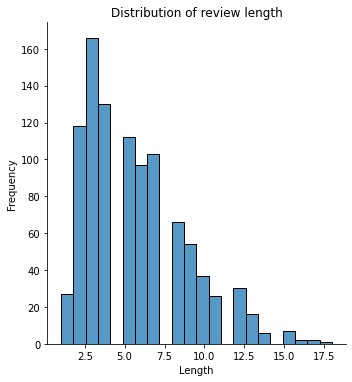

In [19]:
length = []
for l in sent_to_ix:
    length.append(len(l))

import seaborn as sns

sns.displot(length)
plt.title("Distribution of review length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

Here, Max length of sentence is aprx. to 20, and most of the sentences has words atleast of 10, so we take max length as 8.

In [20]:
selected_text = []
max_length = 8

for t in sent_to_ix:
    
    if (len(t) == max_length):
        selected_text.append(t)
    elif (len(t) > max_length):
        selected_text.append(t[:max_length])
    elif (len(t) < max_length):
        req_pad = max_length-len(t)
        zeros = [0]*req_pad
        pad_text = t+zeros
        selected_text.append(pad_text)

In [21]:
selected_text

[[1889, 984, 1248, 0, 0, 0, 0, 0],
 [378, 713, 0, 0, 0, 0, 0, 0],
 [1661, 1676, 1099, 0, 0, 0, 0, 0],
 [1601, 930, 1024, 117, 809, 1402, 1593, 1359],
 [1471, 1048, 728, 1289, 0, 0, 0, 0],
 [694, 45, 1823, 389, 1233, 0, 0, 0],
 [812, 436, 1657, 667, 0, 0, 0, 0],
 [1278, 957, 1419, 350, 1667, 999, 21, 1703],
 [676, 728, 0, 0, 0, 0, 0, 0],
 [728, 1727, 0, 0, 0, 0, 0, 0],
 [1482, 1303, 0, 0, 0, 0, 0, 0],
 [1885, 705, 107, 0, 0, 0, 0, 0],
 [254, 245, 576, 1449, 1595, 541, 1840, 1175],
 [1739, 241, 304, 1343, 280, 364, 0, 0],
 [463, 1287, 1640, 832, 755, 0, 0, 0],
 [1496, 1511, 864, 252, 0, 0, 0, 0],
 [802, 1360, 0, 0, 0, 0, 0, 0],
 [1820, 965, 1526, 1482, 0, 0, 0, 0],
 [1248, 1884, 1703, 946, 29, 1789, 0, 0],
 [957, 0, 0, 0, 0, 0, 0, 0],
 [218, 164, 0, 0, 0, 0, 0, 0],
 [649, 34, 0, 0, 0, 0, 0, 0],
 [1482, 30, 387, 0, 0, 0, 0, 0],
 [350, 245, 936, 880, 134, 0, 0, 0],
 [1223, 0, 0, 0, 0, 0, 0, 0],
 [1680, 1405, 1363, 1795, 231, 1613, 713, 0],
 [1111, 204, 1430, 78, 0, 0, 0, 0],
 [808, 1822, 7

In [22]:
y = [int(yi) for yi in reviews['label'].values]    #labels are in string so we convert them to int.

In [23]:
y[:10]

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [24]:
np.unique(y, return_counts=True)   #balanced

(array([0, 1]), array([500, 500], dtype=int64))

In [25]:
# data split in batch and data type conversion to tensor

import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset

xarray = np.array(selected_text)
yarray = np.array(y)

ix_train = int(xarray.shape[0]*0.7)
ix_valid = int(xarray.shape[0]*0.85)

X_train = torch.tensor(xarray[:ix_train], dtype = torch.long)
Y_train = torch.tensor(yarray[:ix_train], dtype = torch.long)

X_valid = torch.tensor(xarray[ix_train:ix_valid], dtype = torch.long)
Y_valid = torch.tensor(yarray[ix_train:ix_valid], dtype = torch.long)

X_test = torch.tensor(xarray[ix_valid:], dtype = torch.long)
Y_test = torch.tensor(yarray[ix_valid:], dtype = torch.long)

In [26]:
# Batch wise data load

Batch = 50

train_ = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_, batch_size = Batch, shuffle = True, drop_last=True)

valid_ = TensorDataset(X_valid, Y_valid)
valid_loader = DataLoader(valid_, batch_size = Batch, shuffle = False, drop_last=True)

test_ = TensorDataset(X_test, Y_test)
test_loader = DataLoader(test_,  batch_size = Batch, shuffle = False, drop_last=True)

In [27]:
## Model Initilization

In [28]:
num_embed = len(vocab)
embed_dim = 50

inp_sz = embed_dim
rnn_hidsz = 100
nlayer = 1
seq_len = X_train.shape[1]

fc_hidsz = seq_len*rnn_hidsz
out_sz = 2
batch=Batch

## RNN Model

In [29]:
from models import RNN

In [30]:
model_rnn = RNN.RnnSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, batch, fc_hidsz, out_sz)

In [31]:
print(model_rnn)

RnnSentiment(
  (embed): Embedding(1911, 50)
  (rnn): RNN(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)


In [32]:
#loss function and optimizer

criterion_rnn = nn.CrossEntropyLoss()
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), 0.01)

In [33]:
from utils import utilities

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
epochs = 100

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_rnn = []
valid_one_class_p_rnn = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_rnn.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_rnn(xt)
        loss = criterion_rnn(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_rnn, criterion_rnn, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_rnn.append(each_class_pred['0'])
            valid_one_class_p_rnn.append(each_class_pred['1'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_rnn.pth"
                        torch.save(model_rnn, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_rnn.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_rnn.step()

Training started...
Epoch: 0 |Train Loss: 0.7049999833106995 | Train Accuracy: 0.46 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6259999871253967 | Train Accuracy: 0.68 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6840000152587891 | Train Accuracy: 0.56 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7300000190734863 | Train Accuracy: 0.48 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7179999947547913 | Train Accuracy: 0.56 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.796999990940094 | Train Accuracy: 0.46 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7919999957084656 | Train Accuracy: 0.5 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.703000009059906 | Train Accuracy: 0.58 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6959999799728394 | Train Accuracy: 0.62 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7350000143051147 | Train Accuracy: 0.54 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.734000027179718 | Train Accuracy: 0.48 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.78500002622604

Epoch: 7 |Train Loss: 0.48399999737739563 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4650000035762787 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4390000104904175 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.5080000162124634 | Train Accuracy: 0.8 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.45899999141693115 | Train Accuracy: 0.86 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.45500001311302185 | Train Accuracy: 0.86 | Train-Class: [0 1] 
Epoch: 7 |Train Loss: 0.4449999928474426 | Train Accuracy: 0.86 | Train-Class: [0 1] 
Epoch: 7 |Valid Loss: 0.6439999938011169 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 8 |Train Loss: 0.40299999713897705 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.46799999475479126 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.5049999952316284 | Train A

Epoch: 13 |Train Loss: 0.3709999918937683 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3199999928474426 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.31700000166893005 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.34599998593330383 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3919999897480011 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.37700000405311584 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3479999899864197 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3700000047683716 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.4040000140666961

Epoch: 19 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3610000014305115 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3310000002384186 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3440000116825104 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3400000035762787 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3709999918937683 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3840000033378601 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3540000021457672

Epoch: 26 |Train Loss: 0.33500000834465027 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3199999928474426 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.33500000834465027 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Valid Loss: 0.6370000243186951 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3319999873638153 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.37599998712539673 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.317000001668930

Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 32 |Valid Loss: 0.6470000147819519 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 33 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.31299999356269836

Epoch: 39 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Valid Loss: 0.6449999809265137 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 40 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.39399999380111694 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.33300000429153

Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836

Epoch: 52 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836

Epoch: 58 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.312999993562698

Epoch: 64 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 64 |Valid Loss: 0.6240000128746033 | Valid Accuracy: 0.687 | Valid-Class: [0 1] 
Epoch: 65 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.335999995470047 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.37299999594688416

Epoch: 71 |Train Loss: 0.35600000619888306 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3479999899864197 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3440000116825104 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.38199999928474426 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3490000069141388 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.335999995470047 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.3330000042915344 |

Epoch: 77 |Train Loss: 0.335999995470047 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3440000116825104 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3540000021457672 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 77 |Valid Loss: 0.6669999957084656 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 78 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 78 |Train Loss: 0.3529999852180481 | 

Epoch: 83 |Valid Loss: 0.675000011920929 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 84 |Train Loss: 0.34200000762939453 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.41200000047683716 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.38100001215934753 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.35499998927116394 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.3499999940395355 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.33500000834465027 

Epoch: 90 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.32199999690055847 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.35100001096725464 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.38600000739097595 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269

Epoch: 96 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3310000002384186 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Valid Loss: 0.6790000200271606

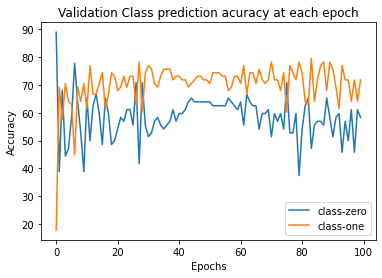

In [35]:
plt.plot(valid_zero_class_p_rnn, label = 'class-zero')
plt.plot(valid_one_class_p_rnn, label = 'class-one')
plt.title("Validation Class prediction acuracy at each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [36]:
def TestAnalysis(model_saved, test_loader):
    test_actual = []
    test_predict = []

    for xtst, ytst in test_loader:
        yp = model_saved(xtst)
        pred_ix = yp.argmax(dim = 1)
        test_predict.append(pred_ix.numpy())
        test_actual.append(ytst.numpy())
    return (np.array(test_predict).reshape(-1,1), np.array(test_actual).reshape(-1,1))

In [37]:
# load model

MODEL_rnn = torch.load("model_rnn.pth")
MODEL_rnn.eval()

RnnSentiment(
  (embed): Embedding(1911, 50)
  (rnn): RNN(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)

In [38]:
test_pred_rnn, test_actual_rnn = TestAnalysis(MODEL_rnn, test_loader)

In [39]:
test_pred_rnn[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [40]:
test_actual_rnn[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [41]:
utilities.EachAccuracyClass(test_actual_rnn, test_pred_rnn)

{'0': 48.33, '1': 83.33}

## LSTM Model

In [42]:
from models import LSTM

In [43]:
model_lstm = LSTM.LSTMSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, batch, fc_hidsz, out_sz)

In [44]:
print(model_lstm)

LSTMSentiment(
  (embed): Embedding(1911, 50)
  (lstm): LSTM(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)


In [45]:
#loss function and optimizer

criterion_lstm = nn.CrossEntropyLoss()
optimizer_lstm = torch.optim.Adam(model_lstm.parameters(), 0.01)

In [46]:
from utils import utilities

In [47]:
epochs = 100

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_lstm = []
valid_one_class_p_lstm = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_lstm.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_lstm(xt)
        loss = criterion_lstm(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_lstm, criterion_lstm, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_lstm.append(each_class_pred['0'])
            valid_one_class_p_lstm.append(each_class_pred['1'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_lstm.pth"
                        torch.save(model_lstm, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_lstm.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_lstm.step()

Training started...
Epoch: 0 |Train Loss: 0.6899999976158142 | Train Accuracy: 0.7 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6759999990463257 | Train Accuracy: 0.6 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.6819999814033508 | Train Accuracy: 0.6 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6629999876022339 | Train Accuracy: 0.64 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6510000228881836 | Train Accuracy: 0.64 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6579999923706055 | Train Accuracy: 0.64 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.777999997138977 | Train Accuracy: 0.46 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6620000004768372 | Train Accuracy: 0.6 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6809999942779541 | Train Accuracy: 0.58 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.781000018119812 | Train Accuracy: 0.48 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.8009999990463257 | Train Accuracy: 0.4 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6620000004768372 | 

Epoch: 6 |Train Loss: 0.34200000762939453 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3199999928474426 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.33000001311302185 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3190000057220459 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3190000057220459 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.34200000762939453 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3440000116825104 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3409999907016754 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3179999887943268 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.32100000977516174 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3179999887943268 | Train Accura

Epoch: 12 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.32100000977516174 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.32499998807907104 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 12 |Valid Loss: 0.6140000224113464 | Valid Accuracy: 0.68 | Valid-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train 

Epoch: 18 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Valid Loss: 0.6230000257492065 | Valid Accuracy: 0.673 | Valid-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train 

Epoch: 24 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 24 |Valid Loss: 0.6169999837875366 | Valid Accuracy: 0.673 | Valid-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 |

Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 |

Epoch: 37 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 37 |Valid Loss: 0.6140000224113464 | Valid Accuracy: 0.687 | Valid-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836

Epoch: 43 |Valid Loss: 0.6129999756813049 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836

Epoch: 50 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 50 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 50 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 50 |Valid Loss: 0.6119999885559082 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836

Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 

Epoch: 63 |Valid Loss: 0.6110000014305115 | Valid Accuracy: 0.7 | Valid-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 |

Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Valid Loss: 0.6110000014305115 | Valid Accuracy: 0.7 | Valid-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 71 |Train Loss: 0.31299999356269836 |

Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Valid Loss: 0.6119999885559082 | Valid Accuracy: 0.7 | Valid-Class: [0 1] 
Epoch: 78 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 78 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 78 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 78 |Train Loss: 0.31299999356269836 |

Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Valid Loss: 0.609000027179718 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 84 |Train Loss: 0.31299999356269836 

Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 

Epoch: 95 |Valid Loss: 0.6050000190734863 | Valid Accuracy: 0.7 | Valid-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 96 |Train Loss: 0.31299999356269836 |

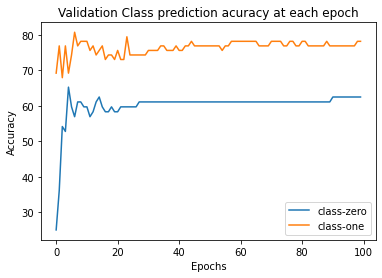

In [48]:
plt.plot(valid_zero_class_p_lstm, label = 'class-zero')
plt.plot(valid_one_class_p_lstm, label = 'class-one')
plt.title("Validation Class prediction acuracy at each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
def TestAnalysis(model_saved, test_loader):
    test_actual = []
    test_predict = []

    for xtst, ytst in test_loader:
        yp = model_saved(xtst)
        pred_ix = yp.argmax(dim = 1)
        test_predict.append(pred_ix.numpy())
        test_actual.append(ytst.numpy())
    return (np.array(test_predict).reshape(-1,1), np.array(test_actual).reshape(-1,1))

In [50]:
# load model

MODEL_lstm = torch.load("model_lstm.pth")
MODEL_lstm.eval()

LSTMSentiment(
  (embed): Embedding(1911, 50)
  (lstm): LSTM(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)

In [51]:
test_pred_lstm, test_actual_lstm = TestAnalysis(MODEL_lstm, test_loader)

In [52]:
test_pred_lstm[:5]

array([[1],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [53]:
test_actual_lstm[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [54]:
utilities.EachAccuracyClass(test_actual_lstm, test_pred_lstm)

{'0': 55.0, '1': 70.0}

## GRU Model

In [55]:
from models import GRU

In [56]:
model_gru = GRU.GRUSentiment(num_embed, embed_dim, inp_sz, rnn_hidsz, nlayer, seq_len, batch, fc_hidsz, out_sz)

In [57]:
print(model_gru)

GRUSentiment(
  (embed): Embedding(1911, 50)
  (gru): GRU(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)


In [58]:
#loss function and optimizer

criterion_gru = nn.CrossEntropyLoss()
optimizer_gru = torch.optim.Adam(model_gru.parameters(), 0.01)

In [59]:
from utils import utilities

In [60]:
epochs = 100

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_gru = []
valid_one_class_p_gru = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_gru.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_gru(xt)
        loss = criterion_gru(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_gru, criterion_gru, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_gru.append(each_class_pred['0'])
            valid_one_class_p_gru.append(each_class_pred['1'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_gru.pth"
                        torch.save(model_gru, FILE)
             
        else:
            torch.nn.utils.clip_grad_norm_(model_gru.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_gru.step()

Training started...
Epoch: 0 |Train Loss: 0.7009999752044678 | Train Accuracy: 0.42 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7300000190734863 | Train Accuracy: 0.52 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7459999918937683 | Train Accuracy: 0.5 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6959999799728394 | Train Accuracy: 0.56 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6230000257492065 | Train Accuracy: 0.7 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6710000038146973 | Train Accuracy: 0.64 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.7450000047683716 | Train Accuracy: 0.54 | Train-Class: [1] 
Epoch: 0 |Train Loss: 0.7149999737739563 | Train Accuracy: 0.58 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.6309999823570251 | Train Accuracy: 0.68 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7789999842643738 | Train Accuracy: 0.44 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.7089999914169312 | Train Accuracy: 0.54 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.8519999980926514

Epoch: 5 |Valid Loss: 0.6629999876022339 | Valid Accuracy: 0.627 | Valid-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3310000002384186 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.35600000619888306 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.38999998569488525 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3499999940395355 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3409999907016754 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.35100001096725464 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.33899998664855957 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.34599998593330383 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.35199999809265137 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3779999911785126 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.367000013589859 | Train 

Epoch: 12 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3160000145435333 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.34200000762939453 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3540000021457672 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.31700000166893005 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.31700000166893005 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Valid Loss: 0.6320000290870667 | Valid Accuracy: 0.66 | Valid-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3160000145435333 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.33500000834465027 | Tra

Epoch: 18 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 18 |Valid Loss: 0.6190000176429749 | Valid Accuracy: 0.68 | Valid-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.31299999356269836 | Trai

Epoch: 25 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3199999928474426 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3179999887943268 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Valid Loss: 0.6230000257492065 | Valid Accuracy: 0.673 | Valid-Class: [0 1] 
Epoch: 26 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 26 |Train Loss: 0.31299999356269836 | 

Epoch: 31 |Train Loss: 0.33500000834465027 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 31 |Valid Loss: 0.6449999809265137 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 32 |Train Loss: 0.33500000834465027 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3490000069141388 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.328000009059906 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836 |

Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3319999873638153 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3240000009536743 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3240000009536743 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Valid Loss: 0.6129999756813049 | 

Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.32199999690055847 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 44 |Valid Loss: 0.6190000176429749 | Valid Accuracy: 0.687 | Valid-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836

Epoch: 51 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3160000145435333 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3190000057220459 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Valid Loss: 0.5960000157356262 | Valid Accuracy: 0.713 | Valid-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.31299999356269836 | T

Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Valid Loss: 0.6200000047683716 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.31299999356269836 

Epoch: 63 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 63 |Valid Loss: 0.609000027179718 | Valid Accuracy: 0.7 | Valid-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 64 |Train Loss: 0.31299999356269836 | Tr

Epoch: 69 |Valid Loss: 0.6240000128746033 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | 

Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Valid Loss: 0.6380000114440918 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.31299999356269836

Epoch: 83 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | 

Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Valid Loss: 0.6399999856948853 | Valid Accuracy: 0.66 | Valid-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 90 |Train Loss: 0.31299999356269836 

Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.32899999618530273 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Valid Loss: 0.6299999952316284 |

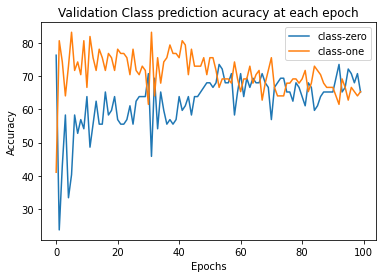

In [61]:
plt.plot(valid_zero_class_p_gru, label = 'class-zero')
plt.plot(valid_one_class_p_gru, label = 'class-one')
plt.title("Validation Class prediction acuracy at each epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [62]:
# load model

MODEL_gru = torch.load("model_gru.pth")
MODEL_gru.eval()

GRUSentiment(
  (embed): Embedding(1911, 50)
  (gru): GRU(50, 100)
  (fc): Linear(in_features=800, out_features=2, bias=True)
  (prob): Softmax(dim=1)
)

In [63]:
test_pred_gru, test_actual_gru = TestAnalysis(MODEL_gru, test_loader)

In [64]:
test_pred_gru[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [65]:
test_actual_gru[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [66]:
utilities.EachAccuracyClass(test_actual_gru, test_pred_gru)

{'0': 60.0, '1': 63.33}

## FFN Model

In [67]:
from models import FFN

In [68]:
num_embed= len(vocab)
embed_dim = 50
batch = 50
ip1 = X_train.shape[1]*embed_dim
op1 = 200
ip2 = 200
op2 = 150
ip3 = 150
op3 = 80
ip4 = 80
op4 = 50
ip5 = 50
op5 = 2

In [69]:
model_ffn = FFN.FeedForwardSentiment(num_embed, embed_dim, batch, ip1, op1, ip2, op2, ip3, op3, ip4, op4, ip5, op5)

In [70]:
print(model_ffn)

FeedForwardSentiment(
  (embed): Embedding(1911, 50)
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=2, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
  (prob): Softmax(dim=1)
)


In [78]:
#loss function and optimizer

criterion_ffn = nn.CrossEntropyLoss()
optimizer_ffn = torch.optim.Adam(model_ffn.parameters(), 0.01)

In [79]:
epochs = 100

valid_losses = []
valid_accuracy = []

each_validp = []
each_valida = []

valid_zero_class_p_ffn = []
valid_one_class_p_ffn = []

print("Training started...")

for e in range(epochs):
    
    #############################[[[trainig]]]#########################################
    train_losses = []
    train_accuracy = []  
    for n, tl in enumerate(train_loader):
        optimizer_ffn.zero_grad()
        xt = tl[0]
        yt = tl[1]
        out = model_ffn(xt)
        loss = criterion_ffn(out, yt)
        train_losses.append(loss.detach())
        train_acc= utilities.TestAccuracy(out, yt)
        train_accuracy.append(train_acc)
        #checking if training predicts both the classes 
        pred_train_ix = out.argmax(dim=1)
        train_classes = np.unique(pred_train_ix.numpy())
        print("Epoch: {} |Train Loss: {} | Train Accuracy: {} | Train-Class: {} ".format(e, np.round(np.array(loss.detach()),3), train_acc, train_classes))
        
        #############################[[[Validation]]]#########################################
        
        if (n == len(train_loader)-1):
            pred_valid, validp_ix, valida_ix, valid_acc, valid_loss = utilities.ValidationAnalysis(model_ffn, criterion_ffn, valid_loader)
            each_validp.append(validp_ix)
            each_valida.append(valida_ix)
            valid_losses.append(valid_loss)
            valid_accuracy.append(valid_acc)
            pred_valid_ix = pred_valid.argmax(dim=1)
            valid_classes = np.unique(pred_valid_ix.numpy())
            each_class_pred = utilities.EachAccuracyClass(valida_ix, validp_ix)
            valid_zero_class_p_ffn.append(each_class_pred['0'])
            valid_one_class_p_ffn.append(each_class_pred['1'])
            print("==================================================================================")
            print("Epoch: {} |Valid Loss: {} | Valid Accuracy: {} | Valid-Class: {} ".format(e, valid_loss, valid_acc, valid_classes))
            print("==================================================================================")

            #############################[[[Model Save]]]#########################################
            if (len(valid_losses) > 2):
                if (valid_losses[-2] > valid_losses[-1]):
                    if (valid_accuracy[-2] < valid_accuracy[-1]):
                        FILE = "model_ffn.pth"
                        torch.save(model_ffn, FILE)
             
        else:
            #torch.nn.utils.clip_grad_norm_(model_ffn.parameters(), max_norm=2.0)
            loss.backward()
            optimizer_ffn.step()

Training started...
Epoch: 0 |Train Loss: 0.37400001287460327 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.3630000054836273 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.3869999945163727 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4309999942779541 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.41200000047683716 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4230000078678131 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4099999964237213 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 0 |Train Loss: 0.3529999852

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 1 |Valid Loss: 0.6179999709129333 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.39399999380111694 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3479999899864197 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 2 |Train Loss: 0.3529999852180481 | Train 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 4 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.47600001096725464 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.39800000190734863 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.4230000078678131 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3790000081062317 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 4 |Train Loss: 0.3930000066757202 | Train

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 6 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.36500000953674316 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.43299999833106995 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.4569999873638153 | Train Accuracy: 0.86 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.40299999713897705 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 6 |Train Loss: 0.3529999852180481 | Trai

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 7 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 7 |Valid Loss: 0.6639999747276306 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 8 |Train Loss: 0.414000004529953 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.35199999809265137 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 8 |Train Loss: 0.3330000042915344 | Train Acc

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 11 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 11 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 11 |Valid Loss: 0.6549999713897705 | Valid Accuracy: 0.66 | Valid-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.4090000092983246 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 12 |Train Loss: 0.31299999356269836 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 13 |Train Loss: 0.3709999918937683 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.37400001287460327 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 13 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 13 |Valid Loss: 0.6930000185966492 | Valid Accuracy: 0.62 | Valid-Class: [0 1] 
Epoch: 14 |Train Loss: 0.43299999833106995 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.41600000858306885 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.43299999833106995 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 14 |Train Loss: 0.393000006675720

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 15 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.4300000071525574 | Train Accuracy: 0.88 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 15 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 15 |Valid Loss: 0.6729999780654907 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 17 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 17 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 17 |Valid Loss: 0.656000018119812 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 19 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.39100000262260437 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 19 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 19 |Valid Loss: 0.6620000004768372 | Valid Accuracy: 0.647 | Valid-Class: [0 1] 
Epoch: 20 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 20 |Train Loss: 0.3330000042915

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 22 |Valid Loss: 0.6660000085830688 | Valid Accuracy: 0.647 | Valid-Class: [0 1] 
Epoch: 23 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.4740000069141388 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.40799999237060547 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.4729999899864197 | Train Accuracy: 0.84 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.453000009059906 | Train Accuracy: 0.86 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3889999985694885 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 23 |Train Loss: 0.3529999852180481 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 24 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 24 |Valid Loss: 0.6579999923706055 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3540000021457672 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 25 |Train Loss: 0.3529999852180481 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 27 |Train Loss: 0.3619999885559082 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.335999995470047 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3970000147819519 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.34700000286102295 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.414000004529953 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.36899998784065247 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 27 |Train Loss: 0.3330000042915344 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 31 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 31 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 31 |Valid Loss: 0.6579999923706055 | Valid Accuracy: 0.66 | Valid-Class: [0 1] 
Epoch: 32 |Train Loss: 0.31299999356269836

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 33 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.35199999809265137 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 33 |Train Loss: 0.38199999928474426 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 33 |Valid Loss: 0.6200000047683716 | Valid Accuracy: 0.687 | Valid-Class: [0 1] 
Epoch: 34 |Train Loss: 0.312999993562698

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 35 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 35 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 35 |Valid Loss: 0.6499999761581421 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 36 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 36 |Train Loss: 0.312999993562698

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 37 |Train Loss: 0.41499999165534973 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.37400001287460327 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3370000123977661 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 37 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 37 |Valid Loss: 0.6349999904632568 | Valid Accuracy: 0.68 | Valid-Class: [0 1] 
Epoch: 38 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.34299999475479126 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 38 |Train Loss: 0.335000008344650

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 39 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3479999899864197 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 39 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 39 |Valid Loss: 0.6259999871253967 | Valid Accuracy: 0.68 | Valid-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 40 |Train Loss: 0.31299999356269836 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 43 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3440000116825104 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.3400000035762787 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 43 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 43 |Valid Loss: 0.6710000038146973 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.33899998664855957 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 44 |Train Loss: 0.3330000042915344

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 45 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 45 |Valid Loss: 0.6759999990463257 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 46 |Train Loss: 0.3529999852180481

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 47 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 47 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 47 |Valid Loss: 0.6480000019073486 | Valid Accuracy: 0.66 | Valid-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 48 |Train Loss: 0.3529999852180481 | 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 49 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 49 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 49 |Valid Loss: 0.6809999942779541 | Valid Accuracy: 0.627 | Valid-Class: [0 1] 
Epoch: 50 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 50 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 50 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 50 |Train Loss: 0.33300000429153

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 51 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3610000014305115 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.3240000009536743 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 51 |Valid Loss: 0.6809999942779541 | Valid Accuracy: 0.633 | Valid-Class: [0 1] 
Epoch: 52 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 52 |Train Loss: 0.33300000429153

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 53 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3160000145435333 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.4009999930858612 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 53 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 53 |Valid Loss: 0.6679999828338623 | Valid Accuracy: 0.647 | Valid-Class: [0 1] 
Epoch: 54 |Train Loss: 0.3330000042915344 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 56 |Valid Loss: 0.6660000085830688 | Valid Accuracy: 0.647 | Valid-Class: [0 1] 
Epoch: 57 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.34299999475479126 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 57 |Train Loss: 0.393000006675720

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 58 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 58 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 58 |Valid Loss: 0.6729999780654907 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 59 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 59 |Train Loss: 0.3129999935626983

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 60 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 60 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 60 |Valid Loss: 0.6169999837875366 | Valid Accuracy: 0.693 | Valid-Class: [0 1] 
Epoch: 61 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 61 |Train Loss: 0.3330000042915344

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 62 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 62 |Train Loss: 0.31299999356269836 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 65 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.38999998569488525 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 65 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 65 |Valid Loss: 0.7110000252723694 | Valid Accuracy: 0.6 | Valid-Class: [0 1] 
Epoch: 66 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 66 |Train Loss: 0.34599998593330383 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 66 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 66 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 66 |Train Loss: 0.3330000042915344

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 67 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.3930000066757202 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.4129999876022339 | Train Accuracy: 0.9 | Train-Class: [0 1] 
Epoch: 67 |Train Loss: 0.4129999876022339

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 68 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.3319999873638153 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 68 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 68 |Valid Loss: 0.6700000166893005 | Valid Accuracy: 0.64 | Valid-Class: [0 1] 
Epoch: 69 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 69 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 69 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 69 |Train Loss: 0.3330000042915344 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 70 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 70 |Train Loss: 0.3330000042915344 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 72 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 72 |Valid Loss: 0.6460000276565552 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 73 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.3540000021457672 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 73 |Train Loss: 0.3529999852180481 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 74 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 74 |Valid Loss: 0.6520000100135803 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 76 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 76 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 76 |Valid Loss: 0.6269999742507935 | Valid Accuracy: 0.687 | Valid-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 77 |Train Loss: 0.3330000042915344

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 78 |Train Loss: 0.33399999141693115 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 78 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 78 |Valid Loss: 0.6399999856948853 | Valid Accuracy: 0.673 | Valid-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 79 |Train Loss: 0.3529999852180481

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 81 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 81 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 81 |Valid Loss: 0.6370000243186951 | Valid Accuracy: 0.68 | Valid-Class: [0 1] 
Epoch: 82 |Train Loss: 0.3330000042915344 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 82 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 82 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 82 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 82 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 82 |Valid Loss: 0.640999972820282 | Valid Accuracy: 0.673 | Valid-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3310000002384186 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 83 |Train Loss: 0.31299999356269836 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 85 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3140000104904175 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 85 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 85 |Valid Loss: 0.6669999957084656 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 86 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 86 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 86 |Valid Loss: 0.6620000004768372 | Valid Accuracy: 0.647 | Valid-Class: [0 1] 
Epoch: 87 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 87 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 87 |Train Loss: 0.3129999935626983

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 88 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 88 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 88 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 88 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 88 |Valid Loss: 0.6600000262260437 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 89 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 89 |Train Loss: 0.3129999935626983

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 90 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 90 |Valid Loss: 0.6439999938011169 | Valid Accuracy: 0.667 | Valid-Class: [0 1] 
Epoch: 91 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.335999995470047 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 91 |Train Loss: 0.3330000042915344 |

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")



Epoch: 92 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 92 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 92 |Valid Loss: 0.69199997186660

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 94 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 94 |Train Loss: 0.3160000145435333 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 94 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 94 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 94 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 94 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 94 |Valid Loss: 0.6600000262260437 | Valid Accuracy: 0.653 | Valid-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.3529999852180481 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 95 |Train Loss: 0.31299999356269836 

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 97 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.34599998593330383 | Train Accuracy: 0.96 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.37299999594688416 | Train Accuracy: 0.94 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 97 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 97 |Valid Loss: 0.6710000038146973 | Valid Accuracy: 0.633 | Valid-Class: [0 1] 
Epoch: 98 |Train Loss: 0.352999985218048

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 98 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 98 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 98 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 98 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 98 |Train Loss: 0.3149999976158142 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 98 |Valid Loss: 0.6809999942779541 | Valid Accuracy: 0.633 | Valid-Class: [0 1] 
Epoch: 99 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 99 |Train Loss: 0.38999998569488525 | Train Accuracy: 0.92 | Train-Class: [0 1] 
Epoch: 99 |Train Loss: 0.3330000042915344 | Train Accuracy: 0.98 | Train-Class: [0 1] 
Epoch: 99 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 99 |Train Loss: 0.31299999356269836 | Train Accuracy: 1.0 | Train-Class: [0 1] 
Epoch: 99 |Train Loss: 0.3529999852180481 

In [80]:
# load model

MODEL_ffn = torch.load("model_ffn.pth")
MODEL_ffn.eval()

FeedForwardSentiment(
  (embed): Embedding(1911, 50)
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=80, bias=True)
  (fc4): Linear(in_features=80, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=2, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
  (prob): Softmax(dim=1)
)

In [81]:
test_pred_ffn, test_actual_ffn = TestAnalysis(MODEL_ffn, test_loader)

C:\anaconda3\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [82]:
test_pred_ffn[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [83]:
test_actual_ffn[:5]

array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int64)

In [84]:
utilities.EachAccuracyClass(test_actual_ffn, test_pred_ffn)

{'0': 57.5, '1': 80.0}